# Economics Ph.D. Job Placement Data 2024 Update
*Wuyang Ren*


## Coverage

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np

In [2]:
api_url = "https://support.econjobmarket.org/api/mapinator"
response = requests.get(api_url)

pl_data = response.json()
pl_df = pd.DataFrame(pl_data)


In [3]:
with open("id_to_type_api.json") as file:
    idt_data = json.load(file)

In [4]:
idt_df = pd.DataFrame(idt_data)
idt_df["institution_id"] = pd.to_numeric(idt_df["institution_id"])

### Top 100 Institutions (Tilburg Ranking)

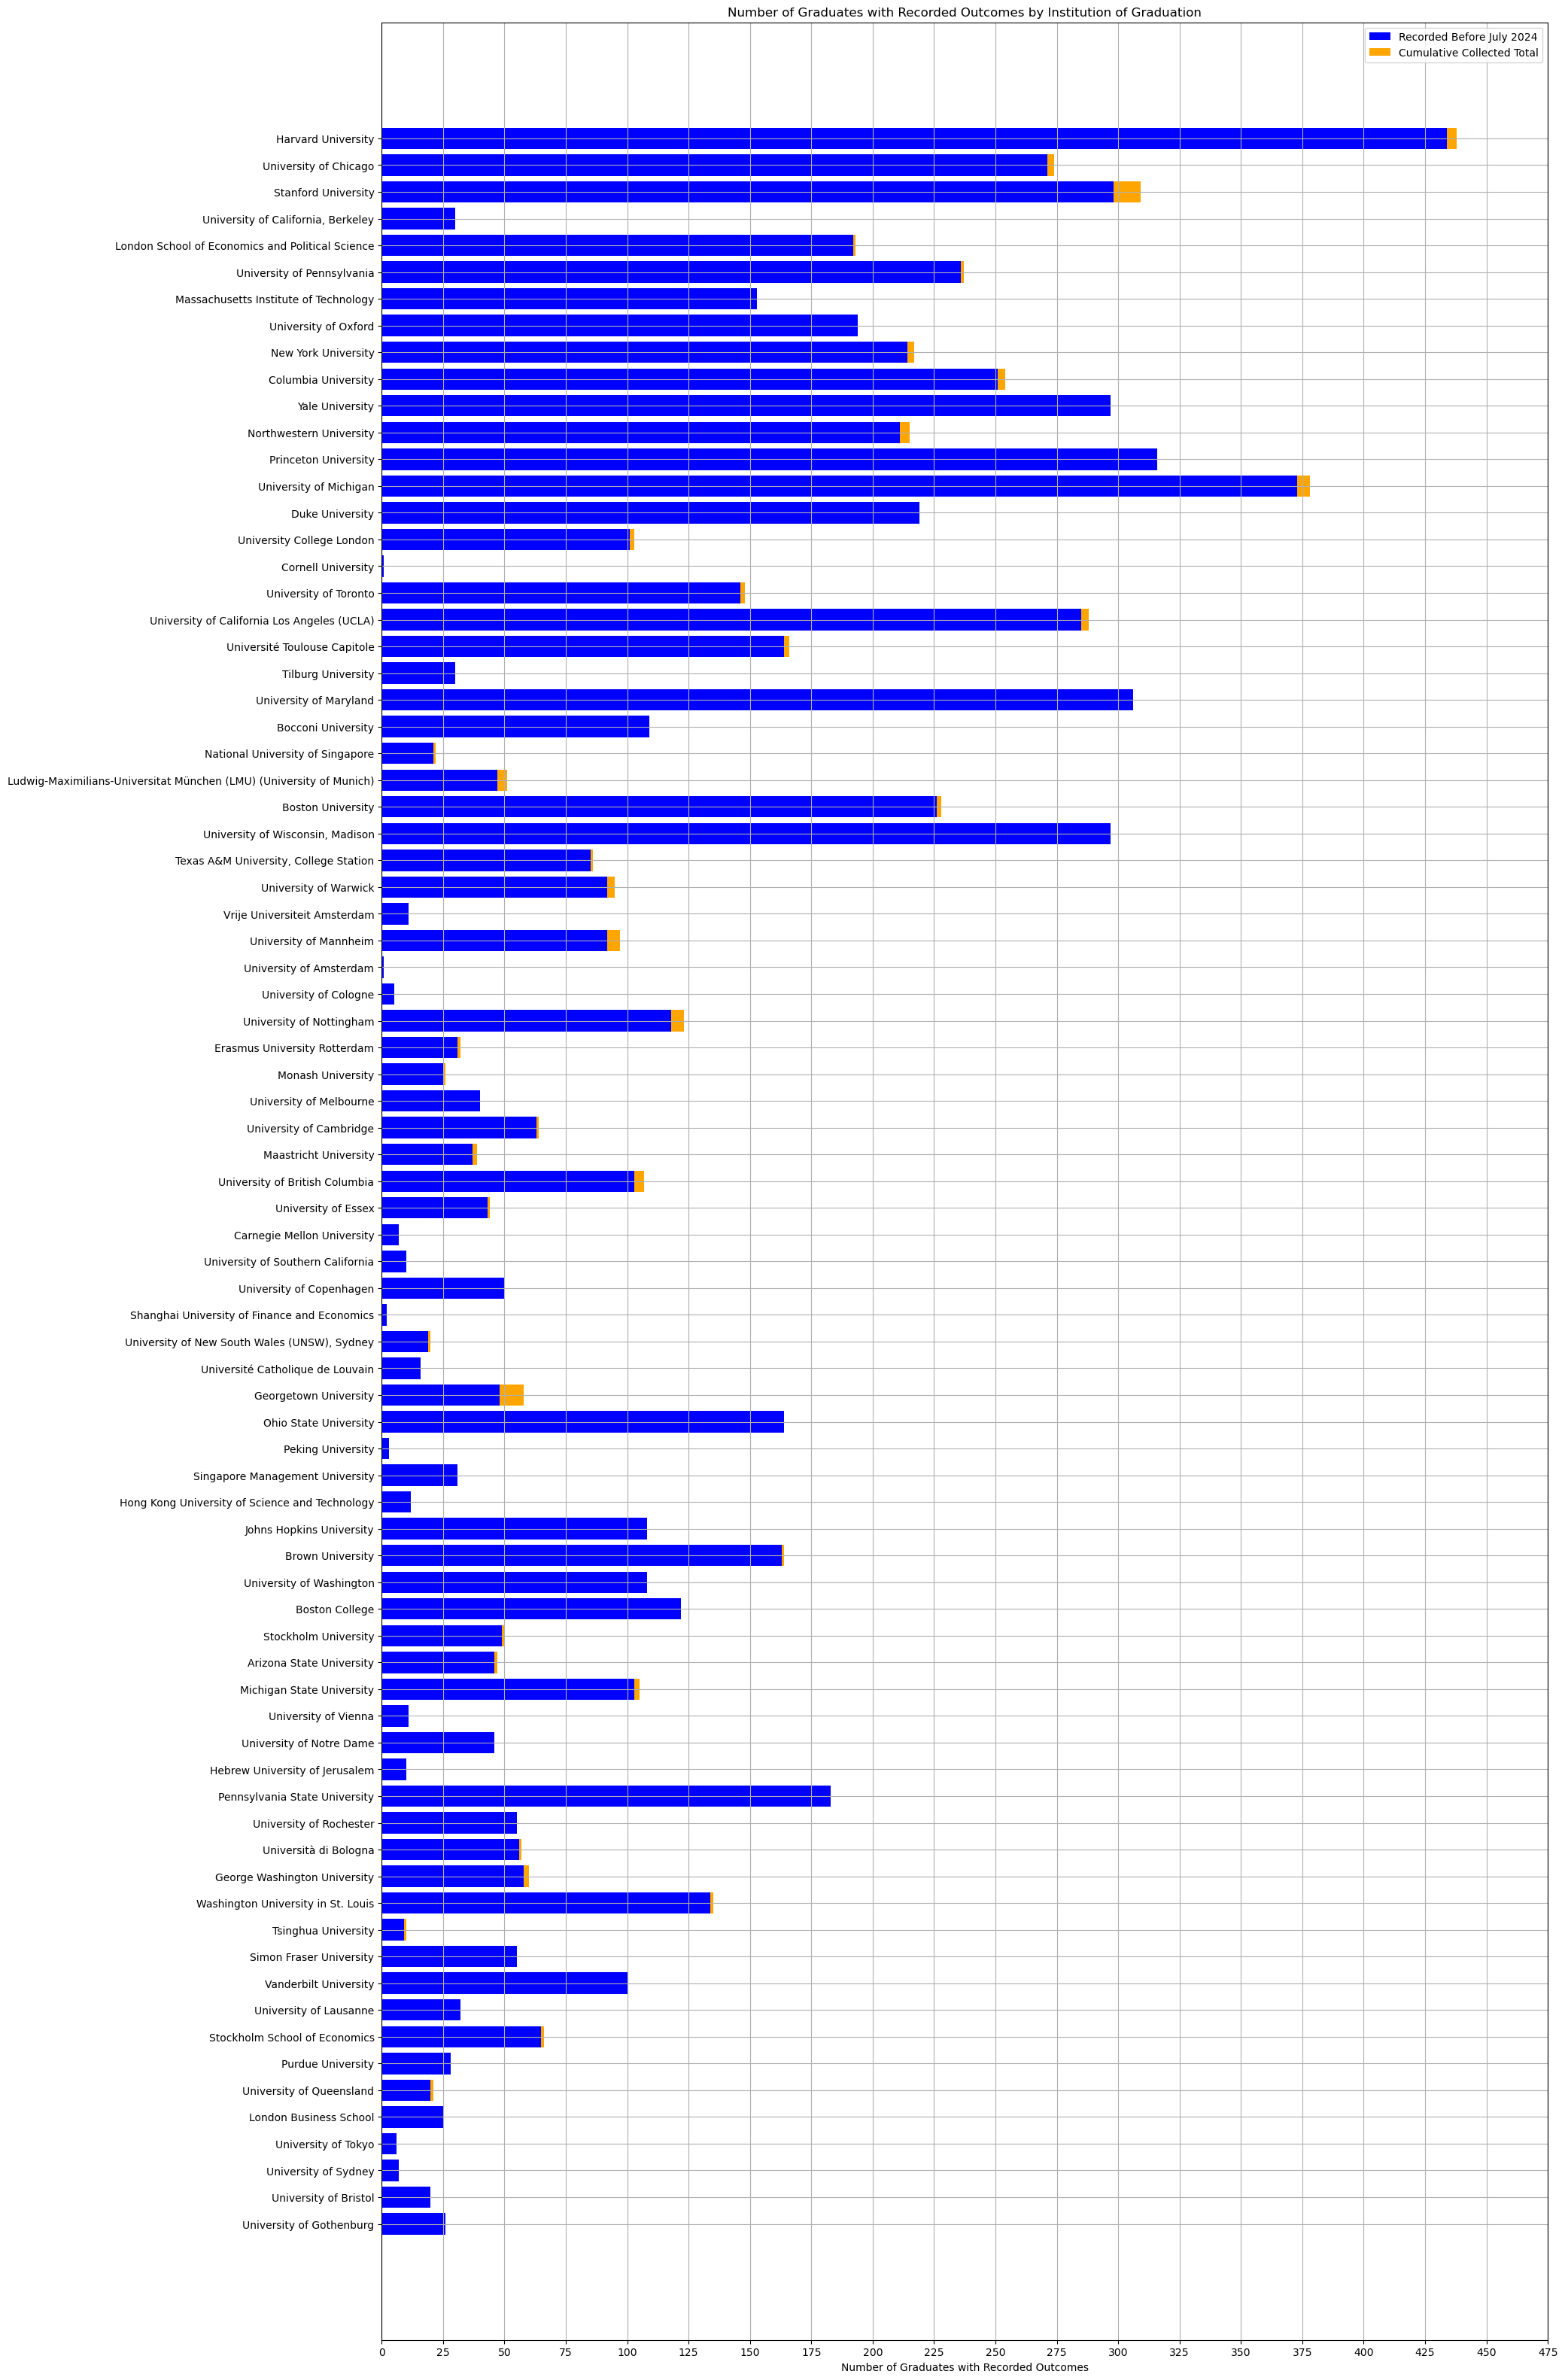

In [5]:
top_100 = pl_df[pl_df['rank'] <= 100].sort_values(by='rank', ascending = False)
top_100['created_at'] = pd.to_datetime(top_100['created_at'])
top_100['startdate']= pd.to_datetime(top_100['startdate'])
top_100['year'] = top_100['startdate'].dt.year

after_mask = top_100['created_at'] >= pd.Timestamp('2024-07-01')
before_mask = top_100['created_at'] < pd.Timestamp('2024-07-01')

top_100_after = top_100[after_mask]
top_100_before = top_100[before_mask]

institutions = list(top_100['from_institution_name'].unique())

before_counts = [len(top_100_before[top_100_before['from_institution_name'] == i]['aid'].unique()) for i in institutions]
after_counts = [len(top_100_after[top_100_after['from_institution_name'] == i]['aid'].unique()) for i in institutions]

fig, ax = plt.subplots(figsize=(20, 40))
bar1 = plt.barh(institutions, before_counts, color='blue', label='Recorded Before July 2024')
bar2 = plt.barh(institutions, after_counts, left=before_counts, color='orange', label='Cumulative Collected Total')

ax.set_xlabel('Number of Graduates with Recorded Outcomes')
ax.set_title('Number of Graduates with Recorded Outcomes by Institution of Graduation')
ax.legend()
ax.grid()
x_ticks = np.arange(0, 500, 25)
ax.set_xticks(x_ticks)

plt.show()

### Tier 1 and 2 Institutions

In [6]:
pl_df['from_institution_id'] = pd.to_numeric(pl_df['from_institution_id'])
pl_df_merged = pd.merge(
    pl_df,
    idt_df,
    left_on="from_institution_id",
    right_on="institution_id",
    how="left")
pl_df_merged.rename(columns={"type": "graduating_tier"}, inplace=True)

top_tier = pl_df_merged[pl_df_merged['graduating_tier'] <= 2]
number = len(top_tier['from_institution_id'].unique())

print(f'The number of tier 1 and 2 institutions is {number}')

The number of tier 1 and 2 institutions is 65


In [7]:
'Cornell University' in top_tier['from_institution_name']

False

/tmp/ipykernel_921/1652099597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tier['created_at'] = pd.to_datetime(top_tier['created_at'])
/tmp/ipykernel_921/1652099597.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tier['startdate']= pd.to_datetime(top_tier['startdate'])
/tmp/ipykernel_921/1652099597.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

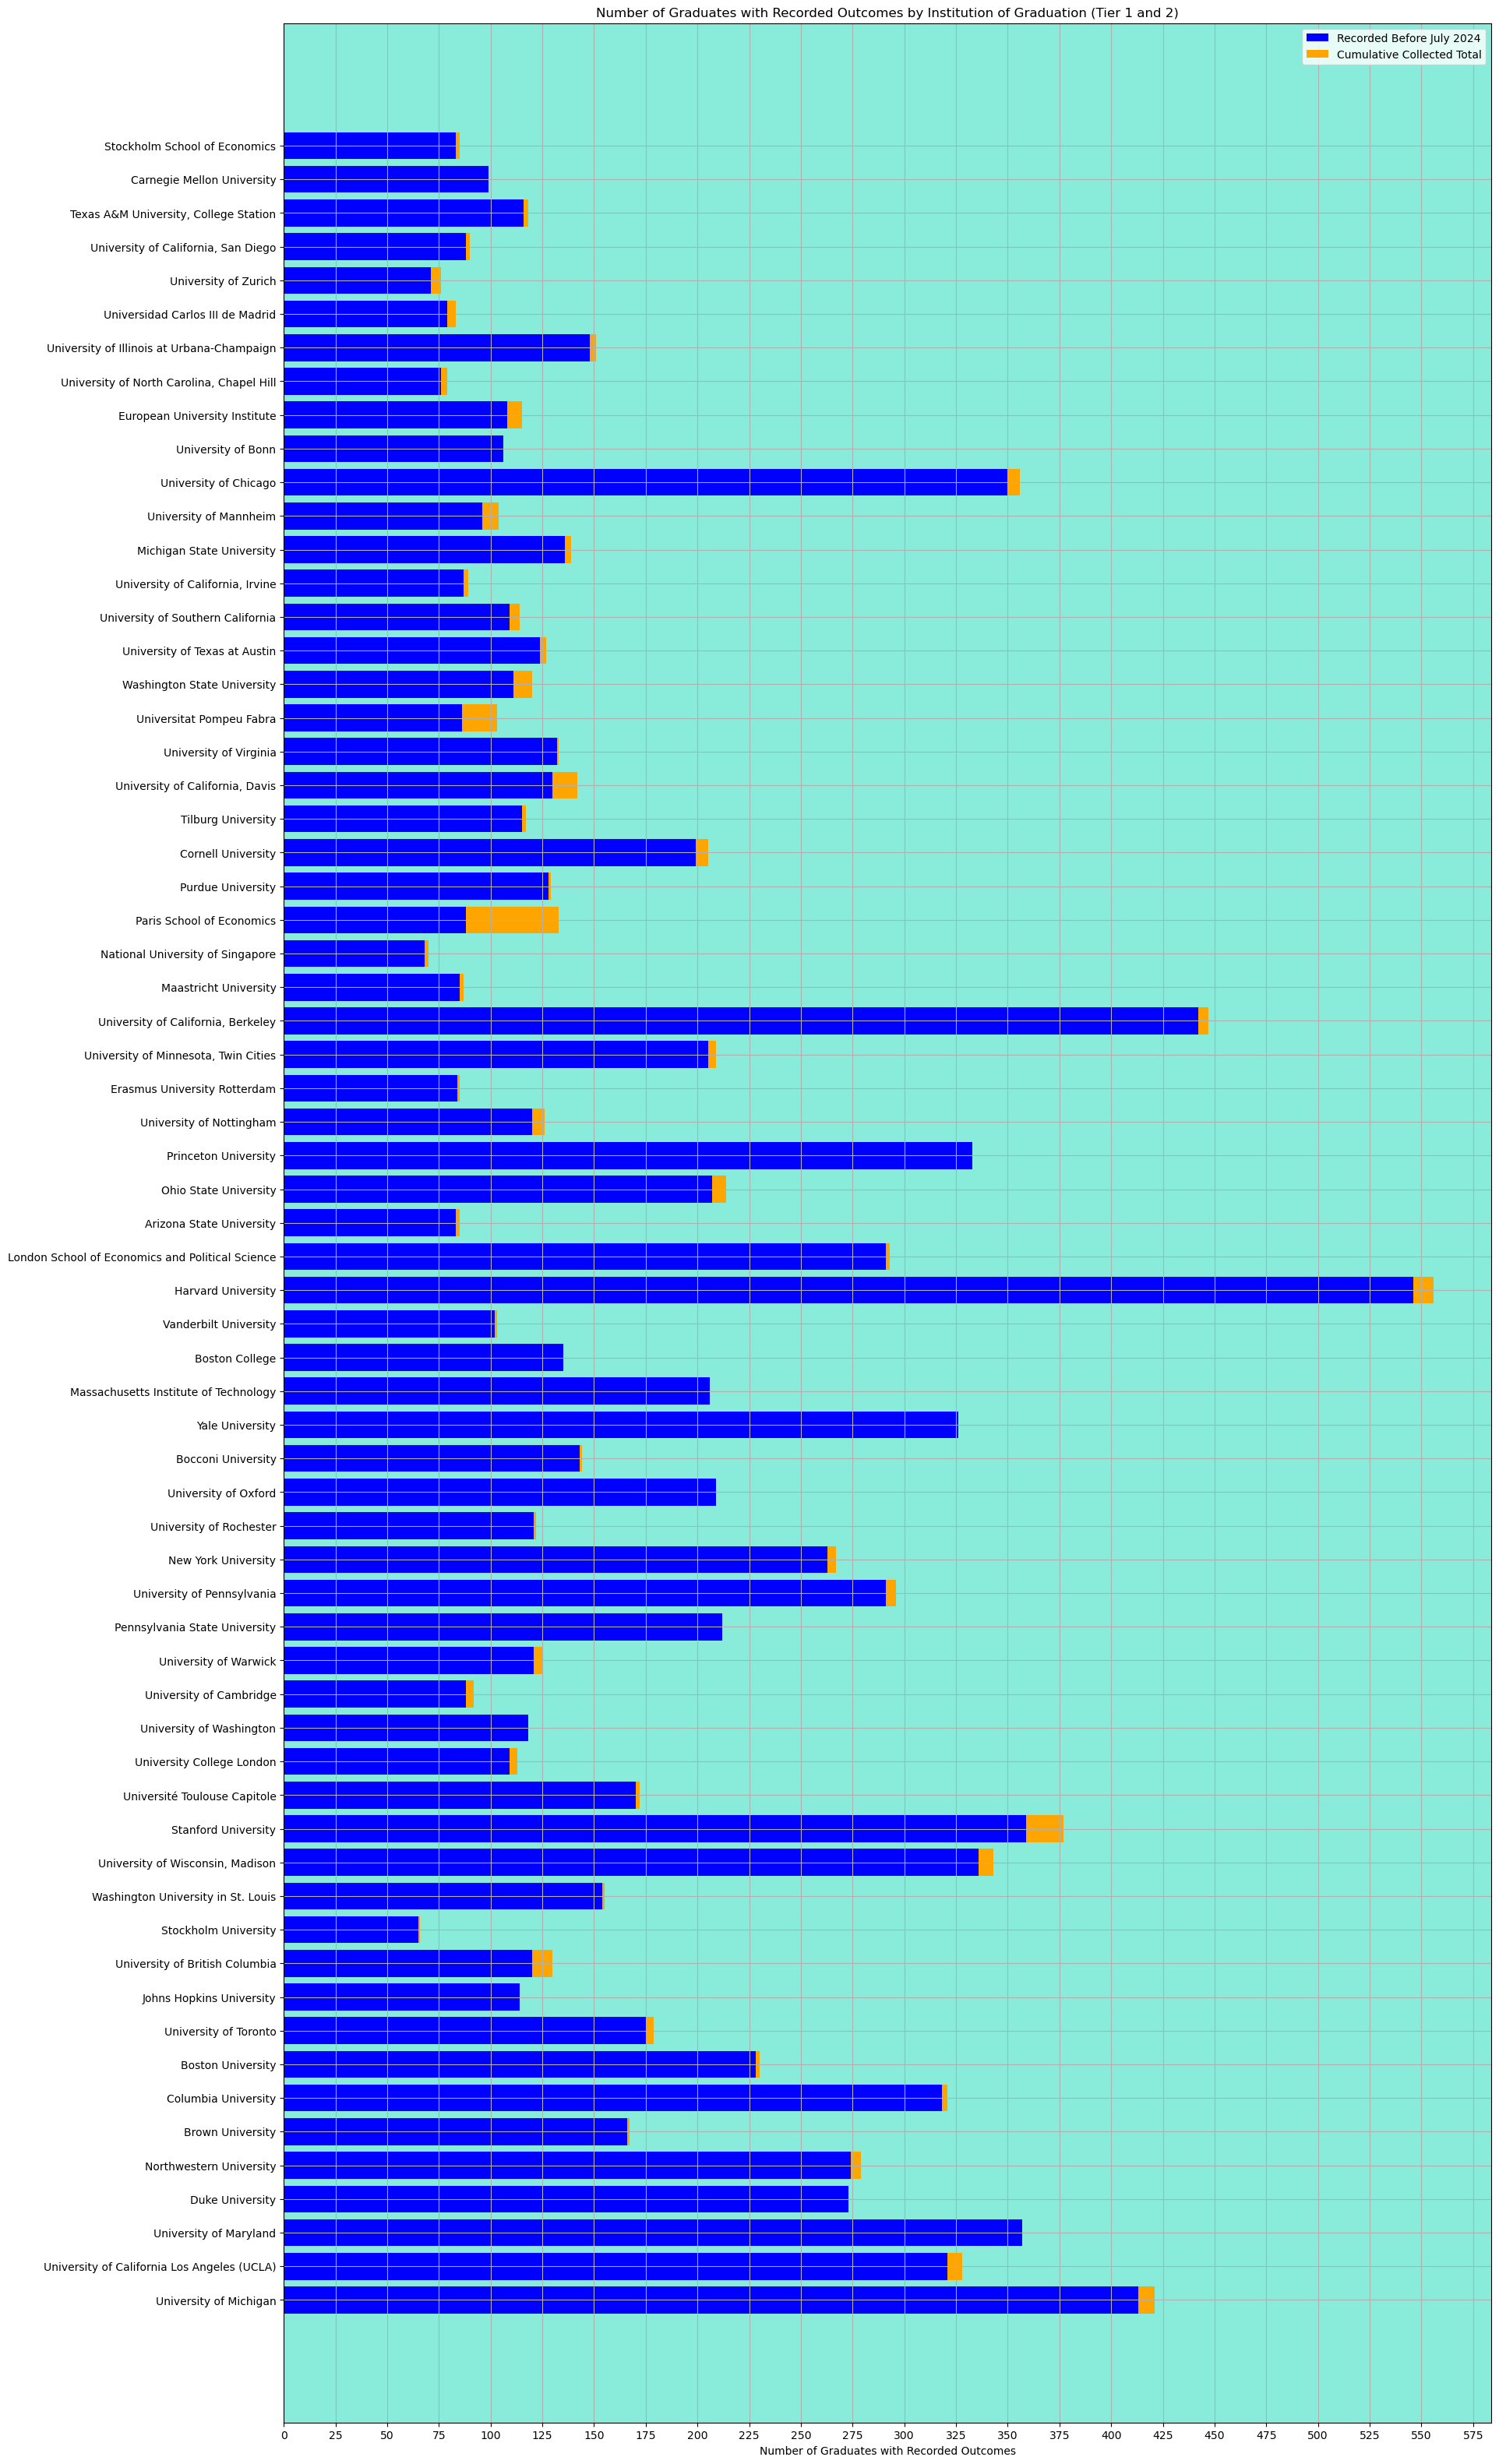

In [8]:
top_tier['created_at'] = pd.to_datetime(top_tier['created_at'])
top_tier['startdate']= pd.to_datetime(top_tier['startdate'])
top_tier['year'] = top_tier['startdate'].dt.year

after_mask_t = top_tier['created_at'] >= pd.Timestamp('2024-07-01')
before_mask_t = top_tier['created_at'] < pd.Timestamp('2024-07-01')

top_tier_after = top_tier[after_mask_t]
top_tier_before = top_tier[before_mask_t]

institutions = list(top_tier['from_institution_name'].unique())

before_counts = [len(top_tier_before[top_tier_before['from_institution_name'] == i]['aid'].unique()) for i in institutions]
after_counts = [len(top_tier_after[top_tier_after['from_institution_name'] == i]['aid'].unique()) for i in institutions]

fig, ax = plt.subplots(figsize=(20, 40))
bar1 = plt.barh(institutions, before_counts, color='blue', label='Recorded Before July 2024')
bar2 = plt.barh(institutions, after_counts, left=before_counts, color='orange', label='Cumulative Collected Total')

ax.set_xlabel('Number of Graduates with Recorded Outcomes')
ax.set_title('Number of Graduates with Recorded Outcomes by Institution of Graduation (Tier 1 and 2)')
ax.legend()
ax.grid()
x_ticks = np.arange(0, 600, 25)
ax.set_xticks(x_ticks)
ax.set_facecolor("#89ecda")

plt.show()

When filtering the dataset by Tilburg's Top 100 ranking, the number of outcomes recorded was underreported. 

In [9]:
len(pl_df[pl_df['from_institution_name'] == "Harvard University"]['aid'].unique())

556

In [10]:
len(top_100[top_100['from_institution_name'] == "Harvard University"]['aid'].unique())

438

In [11]:
len(top_tier[top_tier['from_institution_name'] == "Harvard University"]['aid'].unique())

556

### Graduates by Year: First-Time Hires

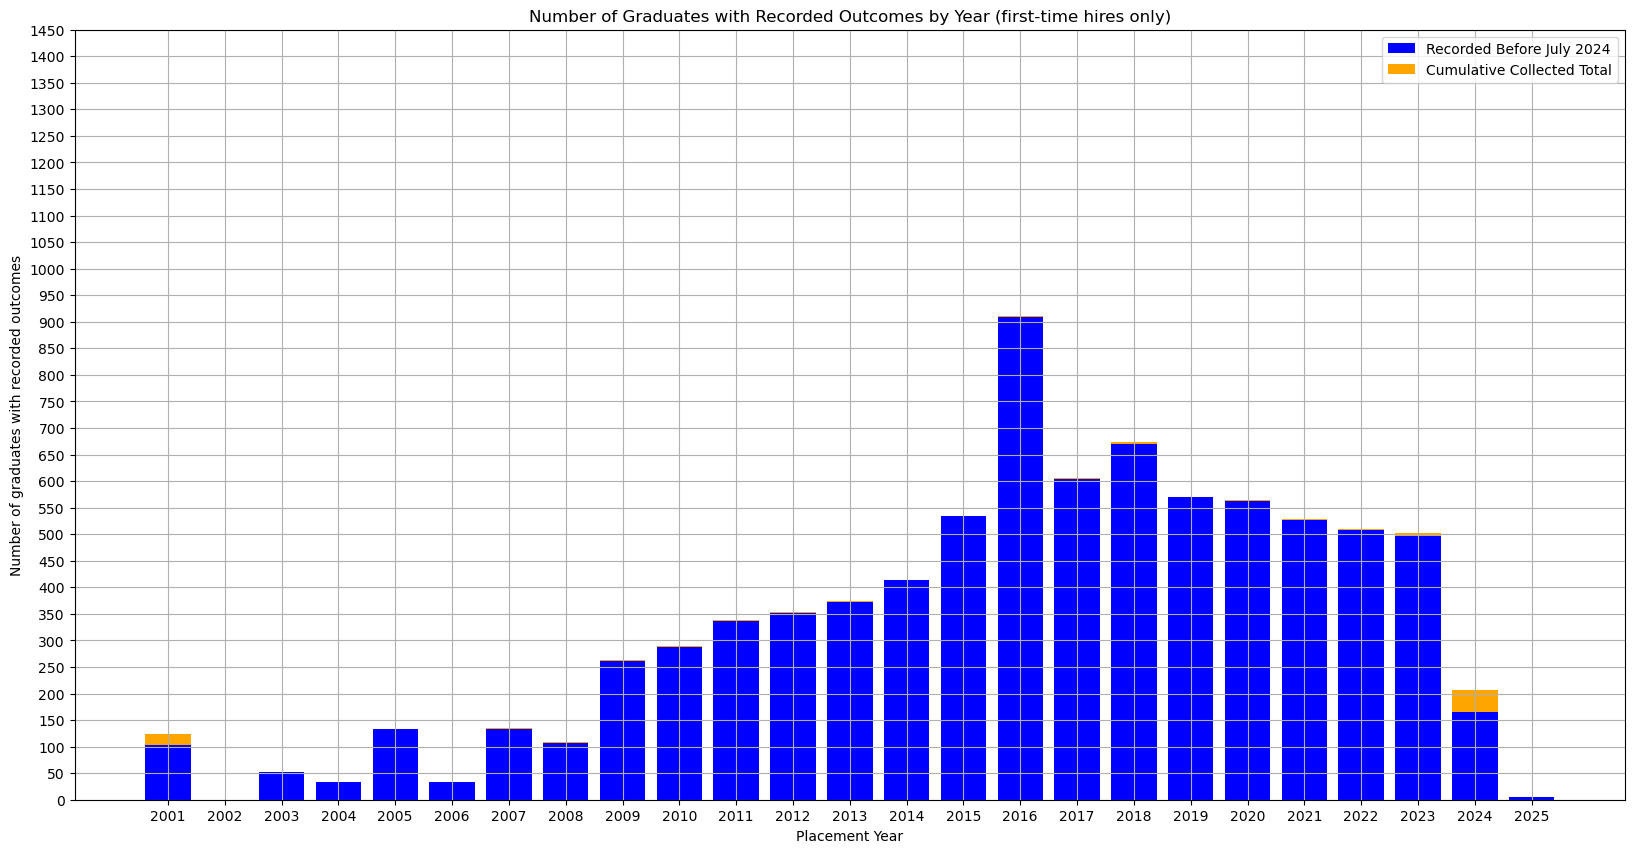

In [12]:
top_100['startdate']= pd.to_datetime(top_100['startdate'])
top_100['year'] = top_100['startdate'].dt.year

top_100_unique = top_100.sort_values('year').groupby('aid').first().reset_index()

top_100_unique_before = top_100_unique[top_100_unique['created_at'] < pd.Timestamp('2024-07-01')]
top_100_unique_after = top_100_unique[top_100_unique['created_at'] >= pd.Timestamp('2024-07-01')]

before_first_time = top_100_unique_before.groupby('year').size()
after_first_time = top_100_unique_after.groupby('year').size()

years = before_first_time.index.union(after_first_time.index)
before_first_time = before_first_time.reindex(years, fill_value=0)
after_first_time = after_first_time.reindex(years, fill_value=0)


fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(years, before_first_time, color='blue', label='Recorded Before July 2024')
bar2 = ax.bar(years, after_first_time, bottom=before_first_time, color='orange', label='Cumulative Collected Total')

ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1500, 50)
x_ticks = np.arange(2001, 2026, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year (first-time hires only)")
ax.legend()
ax.grid()

plt.show()

### First Time Hires: Top Tier Universities

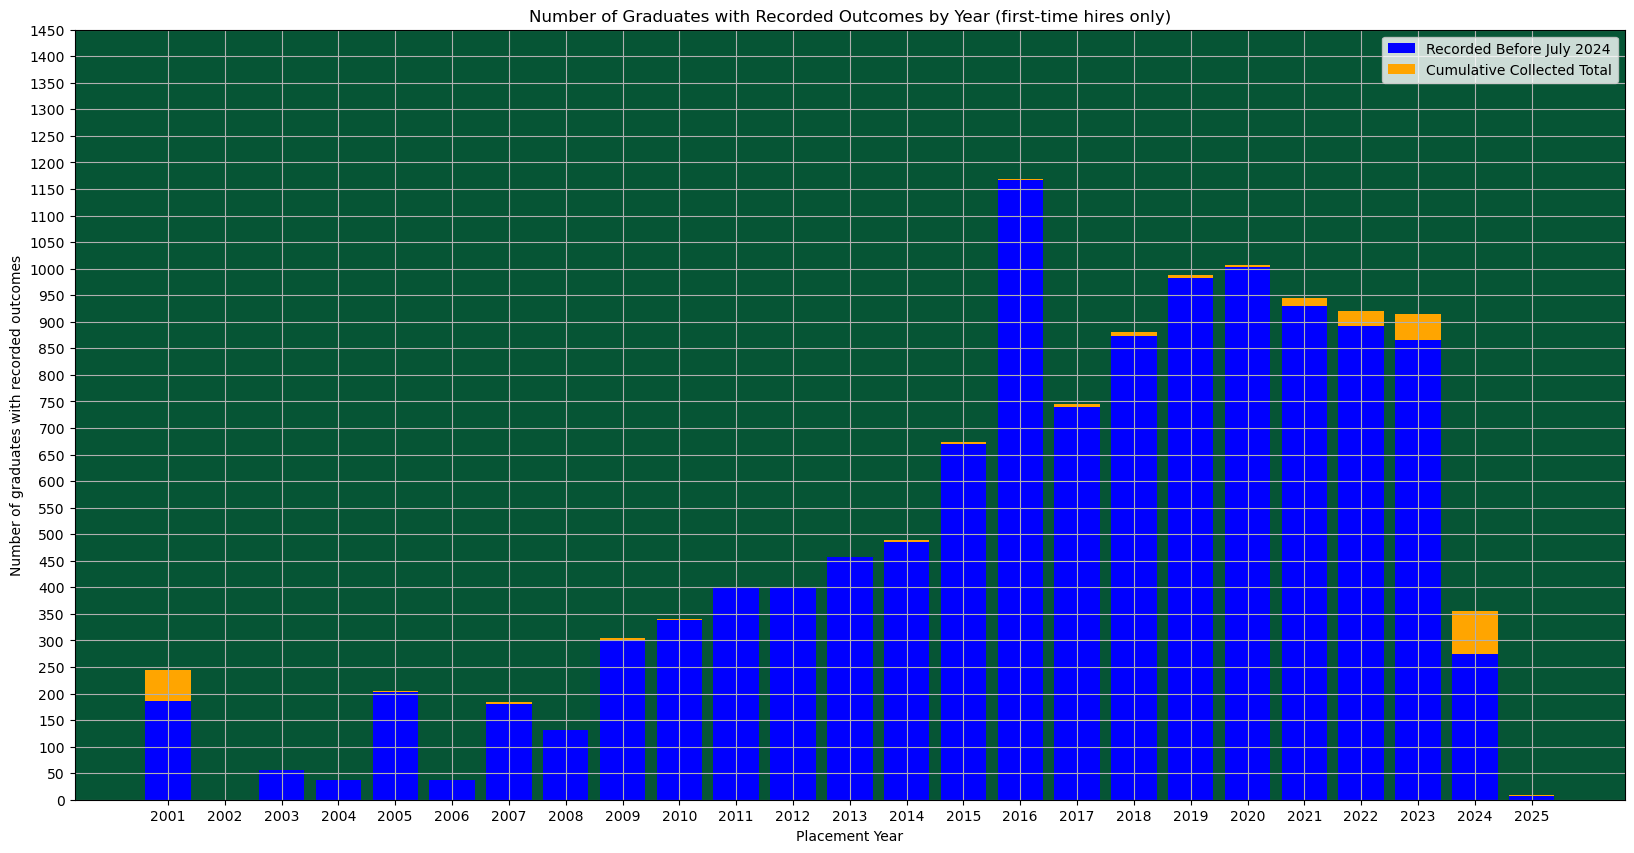

In [13]:
top_tier_unique = top_tier.sort_values('year').groupby('aid').first().reset_index()

top_tier_unique_before = top_tier_unique[top_tier_unique['created_at'] < pd.Timestamp('2024-07-01')]
top_tier_unique_after = top_tier_unique[top_tier_unique['created_at'] >= pd.Timestamp('2024-07-01')]

before_first_time = top_tier_unique_before.groupby('year').size()
after_first_time = top_tier_unique_after.groupby('year').size()

years = before_first_time.index.union(after_first_time.index)
before_first_time = before_first_time.reindex(years, fill_value=0)
after_first_time = after_first_time.reindex(years, fill_value=0)


fig, ax = plt.subplots(figsize=(20, 10))

bar1 = ax.bar(years, before_first_time, color='blue', label='Recorded Before July 2024')
bar2 = ax.bar(years, after_first_time, bottom=before_first_time, color='orange', label='Cumulative Collected Total')

ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1500, 50)
x_ticks = np.arange(2001, 2026, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year (first-time hires only)")
ax.legend()
ax.grid()
ax.set_facecolor("#065535")
plt.show()


### Graduates by Year: All Hires

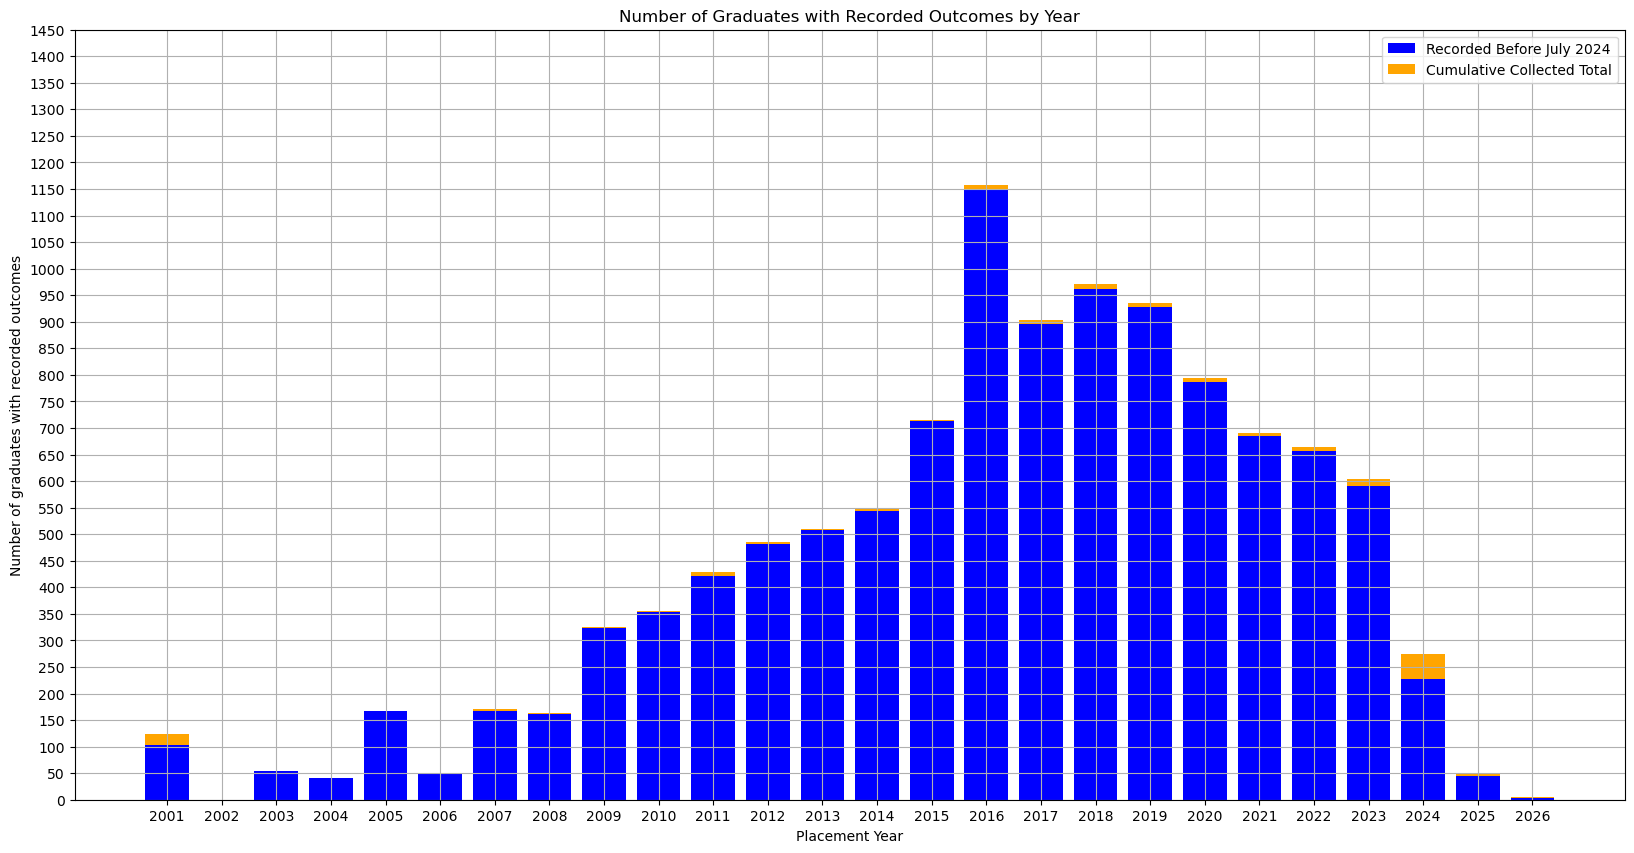

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))

before_total = top_100_before.groupby('year').size()
after_total = top_100_after.groupby('year').size()

years = before_total.index.union(after_total.index)
before_total = before_total.reindex(years, fill_value=0)
after_total = after_total.reindex(years, fill_value=0)


bar1 = ax.bar(years, before_total, color='blue', label='Recorded Before July 2024')
bar2 = ax.bar(years, after_total, bottom=before_total, color='orange', label='Cumulative Collected Total')

ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1500, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year")
ax.legend()
ax.grid()

plt.show()

### All Hires: Top Tier Universities

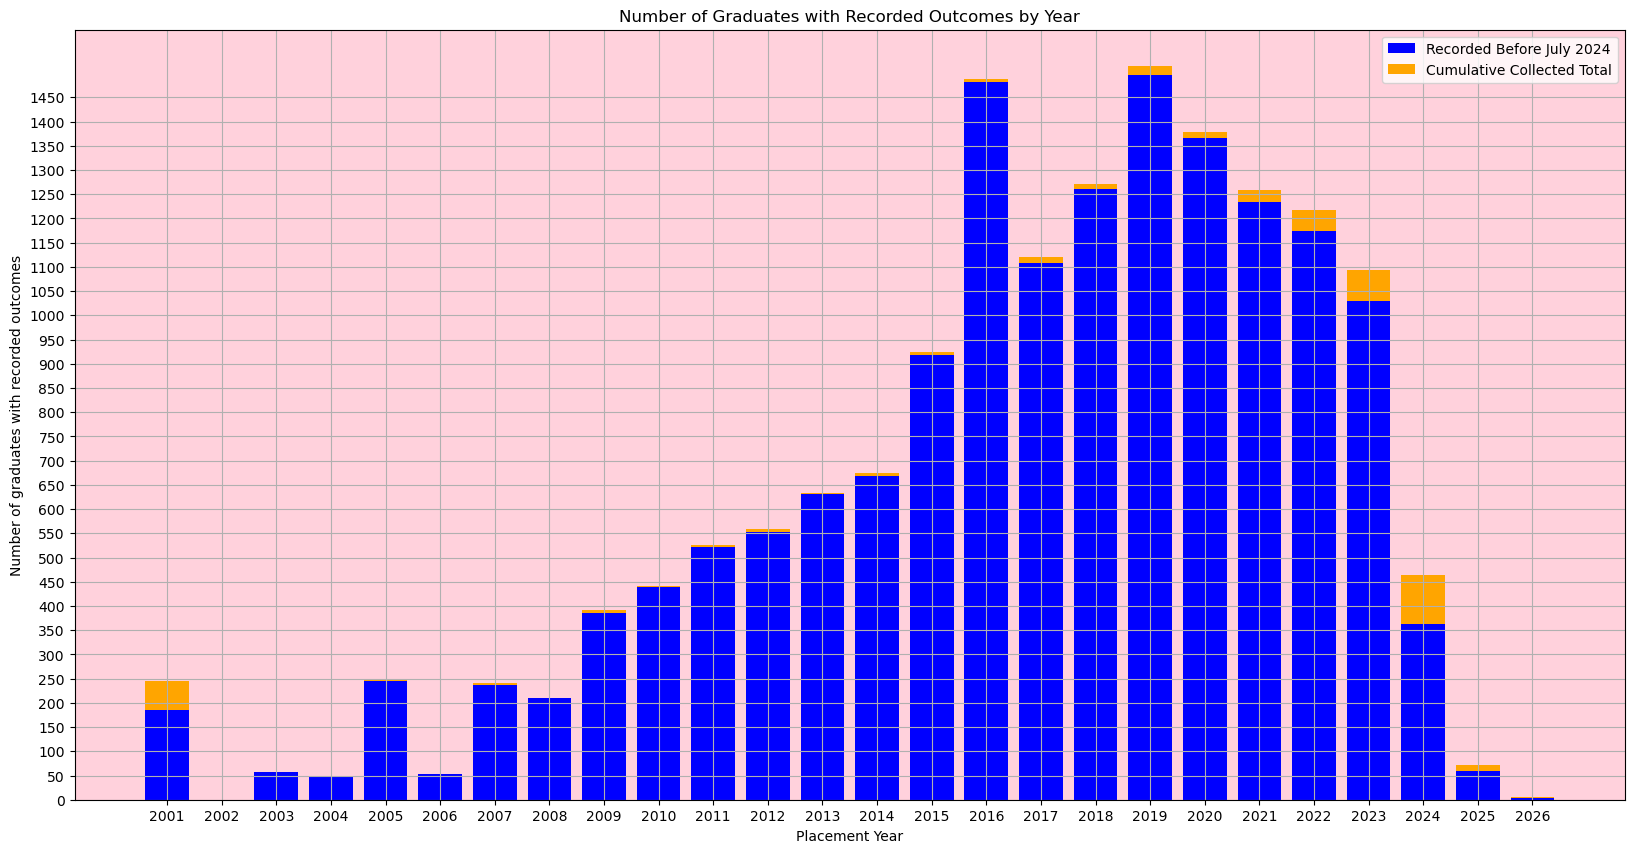

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))

before_total = top_tier_before.groupby('year').size()
after_total = top_tier_after.groupby('year').size()

years = before_total.index.union(after_total.index)
before_total = before_total.reindex(years, fill_value=0)
after_total = after_total.reindex(years, fill_value=0)


bar1 = ax.bar(years, before_total, color='blue', label='Recorded Before July 2024')
bar2 = ax.bar(years, after_total, bottom=before_total, color='orange', label='Cumulative Collected Total')

ax.set_xlabel("Placement Year")
ax.set_ylabel("Number of graduates with recorded outcomes")
y_ticks = np.arange(0, 1500, 50)
x_ticks = np.arange(2001, 2027, 1)
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.set_title("Number of Graduates with Recorded Outcomes by Year")
ax.legend()
ax.grid()
ax.set_facecolor("#ffd1dc")
plt.show()

In [16]:
top_tier['latitude']

0        42.273857
1        42.273857
2        42.273857
3        42.273857
4        42.273857
           ...    
29932    51.917377
29933    51.917377
29935          NaN
29936          NaN
29937          NaN
Name: latitude, Length: 16130, dtype: float64